#### Загрузка файла с данными и изучение общей информации

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('/datasets/games.csv')
display(df)
df.info()
print(df[df==0].count())
print()
print(df.duplicated().sum())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Name                   0
Platform               0
Year_of_Release        0
Genre                  0
NA_sales            4508
EU_sales            5870
JP_sales           10514
Other_sales         6601
Critic_Score           0
User_Score             0
Rating                 0
dtype: int64

0


В таблице 16715 строк и 11 столбцов. Сразу видны пропуски в столбцах: оценка критиков, оценка пользователей и рейтинг. Также сразу видны нули в столбцах: продажи в Сев. Америке, продажи в Европе и продажи в Японии. Применила метод инфо, помимо уже найденных шумов есть относительно небольшое кол-во пропусков в столбцах Name, Year_of_Release, Genre и нули в столбце Other_sales. Грубых дубликатов не найдено. Относительно типов данных следует отметить, что есть как несоответствующие типы, так и типы, которые неудобны для последующего анализа. Кроме этого названия столбцов представлены разными регистрами, для удобства необходимо привести всё к нижнему. Приступим к обработке.

#### Подготовка данных

In [3]:
df.columns = df.columns.str.lower()

df[df['critic_score'].isnull()].head(20)
df['critic_score'] = df['critic_score'].fillna(df.groupby(['platform', 'year_of_release', 'genre'])['critic_score'].transform('mean'))
df['critic_score'] = df['critic_score'].fillna(0)
df['critic_score'] = df['critic_score'].astype(int)

tbd = df[df['user_score']=='tbd']
display(tbd)
df['user_score'] = df['user_score'].replace('tbd','0')
df['user_score'] = df['user_score'].astype(float)
df['user_score'] = df['user_score'].fillna(df.groupby(['platform', 'year_of_release', 'genre'])['user_score'].transform('mean'))
df['user_score'] = df['user_score'].fillna(0)
display(df)

df['rating'] = df['rating'].fillna(' ')

print((16715-16446)/16715)
print()

df.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)
df.info()

df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,63,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,65,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,59,tbd,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8.000,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0,0.000,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,8.300,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8.000,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0,2.225,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,70,6.660,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,75,7.800,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,62,4.700,NaN


0.01609332934489979

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null int64
user_score         16444 non-null float64
rating             16444 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8.000,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0,0.000,,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,8.300,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8.000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0,0.000,,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0,2.225,,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,70,6.660,,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,75,7.800,,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,62,4.700,,0.01


Для удобства работы перевела названия столбцов в нижний регистр. Пропуски в столбцах "оценка критиков" и "оценка пользователей" заполнила сначала средними значениями, сгруппировав параметры "платформа", "год выпуска" и "жанр", затем оставшиеся после заполнения значения заполнила нулями. Полностью заполнять нулями посчитала некорректным, т.к. пропусков было довольно много (оценка критиков почти 50%, оценка пользователей - 38%), мы рисковали получить искажение исследуемых величин по рейтингу при анализе, который нам предстоит впереди. Стоит отметить, что в столбце "оценка пользователей" встретилось порядка 2400 значений = tbd, вероятнее всего это означает "to be determined" = предстоит определить, будут определены, т.е. на тек. момент рейтинг еще не определен, т.е. его нет. Соответсвенно заменила tbd на 0. Пропуски в рейтинге заполнила просто пустым значением (столбец со строковыми значениями), т.к. у нас недостаточно данных для определения рейтинга игры. Тип данных в столбце "оценка критиков" изменила на целочисленный, т.к. в столбце в принципе были только целые числа; а в столбце "оценка пользователей" изменила тип данных с object на float. В целом по пропускам следует сказать, что причина их появления вероятно связана частично с датой релиза игр (т.е. по большинству старых игр оценок попросту нет/возможно не давались; система оценок появилась после выхода игры), частично по причине просто упущенных данных, ну и также по части игр возможно оценки могли быть сформированы позднее, чем была сделана выгрузка. Также для последующего анализа посчитала суммарные продажи во всех регионах и записала их в отдельный столбец.

#### Исследовательский анализ данных

In [4]:
df.groupby('year_of_release')['name'].count()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

Посмотрим, сколько игр выпускалось в разные годы. Прорывом можно назвать 2006-2011 год. (ежегодно выходит более 1000 игр) и не зря, ведь именно в 2000-е основными движущими силами развития игровой индустрии становится широкое распространение интернета и появление достаточно производительных для реализации игр мобильных устройств. Происходят такие важные события, как выход WoW, выход iOs, Google выпускает на рынок первую версию Android и мн. др. Нарастающий период - с начала 80х и до начала 2000х. И после вспышки продаж в 2006-2011 гг объем продаж стабилизируется и выравнивается до 500-600 в год.

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985.0,0.02,NaN,NaN,NaN,NaN,NaN
1994.0,NaN,6.03,NaN,NaN,NaN,NaN
1995.0,NaN,35.96,NaN,NaN,NaN,NaN
1996.0,NaN,94.70,NaN,NaN,NaN,NaN
1997.0,NaN,136.17,NaN,NaN,NaN,NaN
1998.0,NaN,169.49,NaN,NaN,NaN,NaN
1999.0,NaN,144.53,NaN,NaN,NaN,NaN
2000.0,NaN,96.37,39.17,NaN,NaN,NaN
2001.0,NaN,35.59,166.43,NaN,NaN,NaN


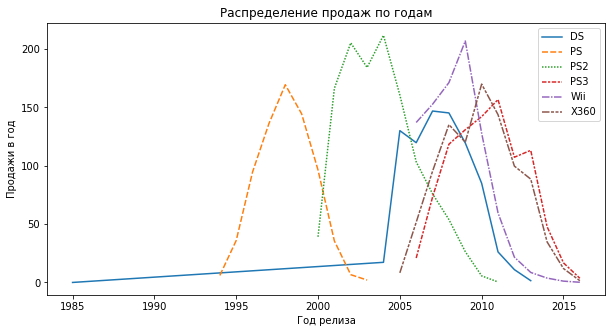

In [5]:
pl = df.groupby('platform')['sum_sales'].sum()
pl_sort = pl.sort_values(ascending=False)
pl_sort
plt_max_profit = df.query('platform in ("PS2", "X360", "PS3", "Wii", "DS", "PS")')

import matplotlib.pyplot as plt
import seaborn as sns
plt_max_profit_pivot = plt_max_profit.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
display(plt_max_profit_pivot)
plt.figure(figsize=(10,5));
sns.lineplot(data=plt_max_profit_pivot);
plt.xlabel('Год релиза');
plt.ylabel('Продажи в год');
plt.title('Распределение продаж по годам');

Наибольшие суммарные продажи имеют следующие платформы: PS2 - 1233.56, X360 - 961.24, PS3 - 931.34, Wii - 891.18, DS - 802.78, PS - 727.58. Построила график распределения продаж по годам по данным платформам. Глядя на график, можно сделать вывод, что характерный срок, за который появляются новые и исчезают старые платформы равен примерно 7-8 годам.

Для анализа будем использовать наиболее актуальный период времени. Т.е. период времени, который не только наиболее близок к прогнозному 2017 году, но в то же время является более ровным, стабильным (без скачков и спадов) и как следсвие наиболее правильным для анализа. Поэтому уместно проводить анализ на примере последних 5 лет, т.е. 2012-2016 гг.

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: sum_sales, dtype: float64


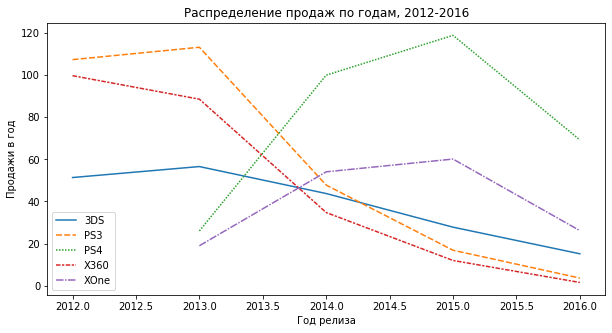

In [6]:
df_in_actual_time = df.query('year_of_release > 2011')
df_in_actual_time
profit_plat = df_in_actual_time.groupby('platform')['sum_sales'].sum()
print(profit_plat.sort_values(ascending=False))

profit_plat_max = df_in_actual_time.query('platform in ("PS4", "PS3", "X360", "3DS", "XOne")')
profit_plat_max_pivot = profit_plat_max.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
plt.figure(figsize=(10,5));
sns.lineplot(data=profit_plat_max_pivot);
plt.xlabel('Год релиза');
plt.ylabel('Продажи в год');
plt.title('Распределение продаж по годам, 2012-2016');

Построила график распределения по годам за период 2012-2016 по наиболее прибыльным платформам. Платформы PS3, X360 и 3DS падают с 2013 года. Платформы PS4 и XOne росли до 2015 года и в 2015 году начали падать. Падение спроса по первым трем моделям связано с выходом новых моделей. Падение спроса по PS4 и XOne в 2015 году возможно связан с постэффектом кризиса 2014 года и снижением спроса потребителей в целом. Потенциально прибыльные игровые приставки PS3, PS4 и чуть ниже доходы по X360.

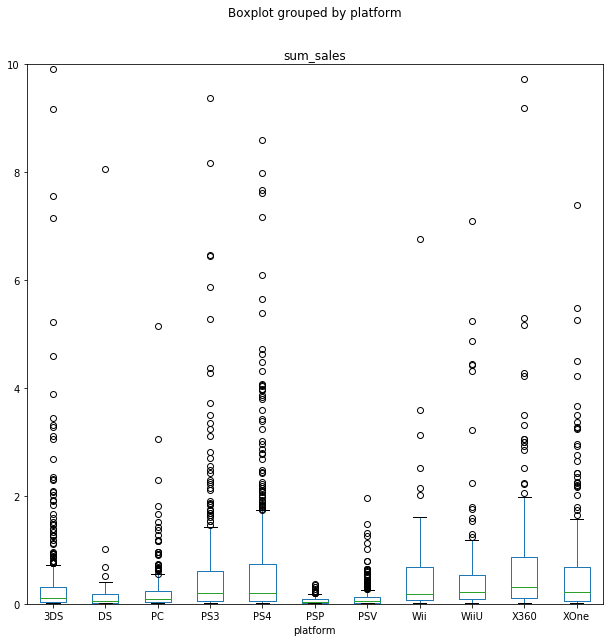

In [7]:
df_in_actual_time.boxplot(by ='platform', column =['sum_sales'], grid = False, figsize=(10,10));
plt.ylim(0, 10);

Построила диаграмму размаха по глобальным продажам в разрезе платформ. В целом можно сказать, что средний уровень объемов продаж по консоли X360 выше среднего уровня остальных платформ. Чуть хуже средний уровень продаж у PS3, PS4 и XOne. Самое большое количество выбросов у консолей PS3, PS4 и 3DS. Это говорит о том, что данные консоли имеют достаточно широкий разброс значений в положительную сторону. Относительно максимальных и минимальных значений, мин значения у большинства консолей стремятся к 0, чуть лучше обстоят дела по платформам X360 и WiiU. По макс значениям - X360 имеет самое максимальное значение 2 млн проданных копий. Уступают ему PS3, PS4, XOne, Wii, WiiU, объем продаж по ним примерно 1,5-1,8 прод-х копий. Остальные платформы на порядок хуже и по объемам не дотягивают даже до 1 млн проданных копий в год. Т.о. среди всех платформ самая сильная позиция у консоли X360. Самая слабая - у PSP.

0.29076234727923045

-0.010060664711719038


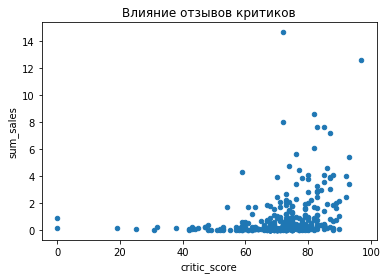

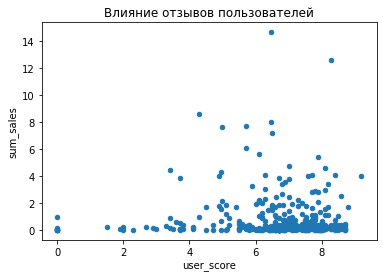

In [8]:
ps4 = df_in_actual_time.query('platform == "PS4"')
ps4.plot(x='critic_score', y='sum_sales', kind='scatter');
plt.title('Влияние отзывов критиков');

ps4.plot(x='user_score', y='sum_sales', kind='scatter');
plt.title('Влияние отзывов пользователей');

print(ps4['sum_sales'].corr(ps4['critic_score']))
print()
print(ps4['sum_sales'].corr(ps4['user_score']))

Построила диаграммы рассеяния для анализа влияния оценки критиков на продажи и оценки пользователей на продажи для платформы PS4. Заметно совсем небольшое влияние как одного так и второго фактора. По оценкам критиков, при оценке в диапазоне 60-80 продажи возрастают с нулевых позиций до 1-1,5 млн; и обратное влияние при отсутствии оценок продаж практически нет. По оценкам пользователей ситуация похожая, примерно 7-9 баллов повышают продажи до 1 млн копий в год. И при отсутствии оценок продаж нет. Что касается высоких уровней продаж (от 20-40 млн в год) - влияния нет. Нашла к-ты корреляции, которые также подтвердили очень слабое влияние показателей на продажи. Но между ними есть колоссальная разница. К-т кор-ции по оценке критиков 0,3, а по оценке пользователей 0,01. Т.е. влияние показателей слабое, но оценка критиков имеет просто слабое влияние, а оценка пользователей практически не имеет влияния.

0.22649684594089808

0.11017747154577016


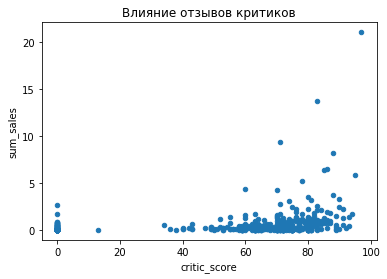

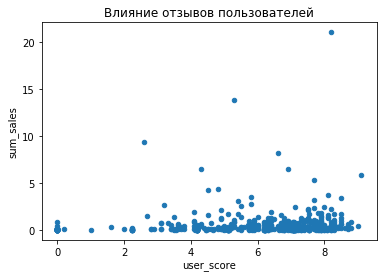

In [9]:
ps3 = df_in_actual_time.query('platform == "PS3"')
ps3.plot(x='critic_score', y='sum_sales', kind='scatter');
plt.title('Влияние отзывов критиков');

ps3.plot(x='user_score', y='sum_sales', kind='scatter');
plt.title('Влияние отзывов пользователей');

print(ps3['sum_sales'].corr(ps3['critic_score']))
print()
print(ps3['sum_sales'].corr(ps3['user_score']))

0.2648818008185562

0.08112710855956509


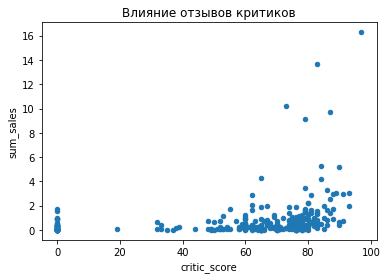

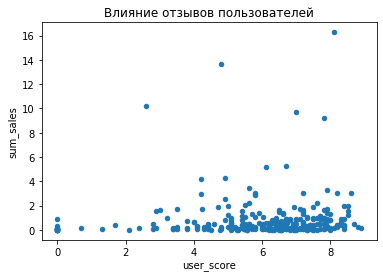

In [10]:
x360 = df_in_actual_time.query('platform == "X360"')
x360.plot(x='critic_score', y='sum_sales', kind='scatter');
plt.title('Влияние отзывов критиков');

x360.plot(x='user_score', y='sum_sales', kind='scatter');
plt.title('Влияние отзывов пользователей');

print(x360['sum_sales'].corr(x360['critic_score']))
print()
print(x360['sum_sales'].corr(x360['user_score']))

Произвела те же действия для платформ PS3 и X360. Ситуация примерно та же самая. Влияния нет. Единственное, что я бы отметила, так это наличие рассеивания значений по PS4, т.е. есть точечные значения, которые влияют на цену 20-40 млн в крайне слабой степени, тогда как у PS3 и X360 таких значений практически нет совсем. И еще момент, к-т корр-ции по оценке пользователей у PS3 и X360 выше чем у PS4. К-т корр-ции по оценке критиков у PS4 выше чем у PS3 и X360. Думаю, эти отличия связаны со спецификой игр и соответствующих платформ.

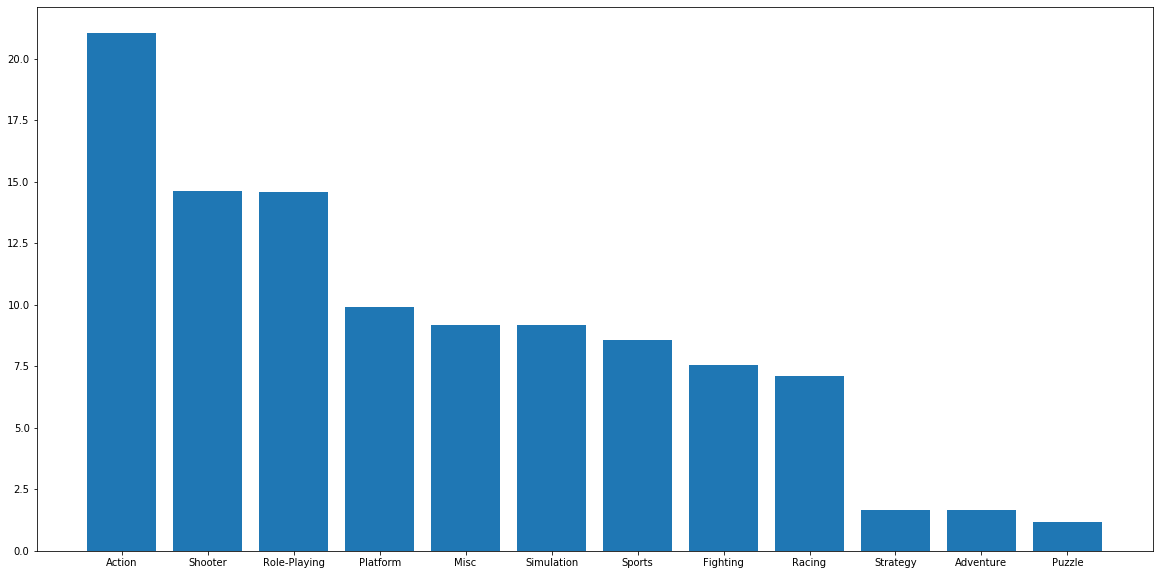

In [11]:
df_in_actual_time.groupby('genre')['sum_sales'].sum()
plt.figure(figsize=(20,10))
plt.bar(df_in_actual_time['genre'], df_in_actual_time['sum_sales'])
plt.show()

Построила распределение игр по жанрам. Безусловно самый прибыльный жанр - это Action (22-23 млн). После него идут shooter и role-playing (около 15 млн копий). Самые низкие продажи у жанра puzzle (1,2 млн копий). Стоит отметить, что продажи игр жанра action значительно выше всех остальных. Тогда как продажи жанра puzzle и продажи жанра strategy и adventure также выделяются среди остальных жанров своими низкими показателями. По action такой высокий уровень продаж связан с тем, что данный жанр подходит и интересен абсолютно всем, сложно представить людей, которым неинтересен экшн. По пазлам - это очень старая игра, которая начиналась еще с тетриса, и даже просто, исходя из того, что все очень хорошо знают, что это такое, можно сказать, что это уже не вызывает какого-то массового интереса.

#### Портрет пользователя каждого региона

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64


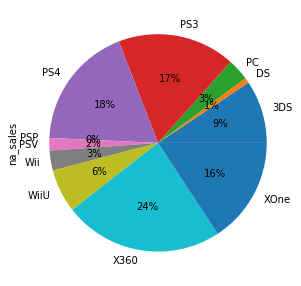

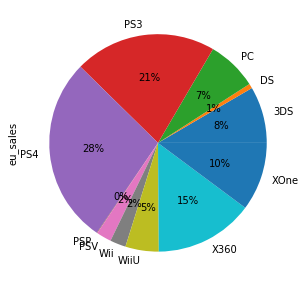

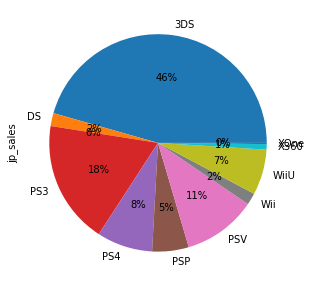

In [12]:
na = df_in_actual_time.groupby('platform')['na_sales'].sum()
print(na.sort_values(ascending=False).head())
print()
eu = df_in_actual_time.groupby('platform')['eu_sales'].sum()
print(eu.sort_values(ascending=False).head())
print()
jp = df_in_actual_time.groupby('platform')['jp_sales'].sum()
print(jp.sort_values(ascending=False).head())

plt.figure(figsize=(5,5))
na.plot(y=df_in_actual_time['platform'], kind='pie', autopct='%1.0f%%');

plt.figure(figsize=(5,5))
eu.plot(y=df_in_actual_time['platform'], kind='pie', autopct='%1.0f%%');

plt.figure(figsize=(5,5))
jp.plot(y=df_in_actual_time['platform'], kind='pie', autopct='%1.0f%%');

Топ-5 для Америки это X360 с долей 24%, PS4 - 18%, PS3 - 17%, XOne - 16%, 3DS - 9%. Самая высокая доля продаж у Х360, самая низкая у 3DS. Топ-5 для Европы: PS4, PS3, X360, XOne, 3DS. Самый большой объем продаж у PS4 - 28%, 5е место у 3DS - 8%. Топ-5 для Японии: 3DS, PS3, PSV, PS4, WiiU. С огромным отрывом на 1м месте 3DS 46%, на 5м месте WiiU - 7%.

In [13]:
na_genre = df_in_actual_time.groupby('genre')['na_sales'].sum()
print(na_genre.sort_values(ascending=False).head())
print()
eu_genre = df_in_actual_time.groupby('genre')['eu_sales'].sum()
print(eu_genre.sort_values(ascending=False).head())
print()
jp_genre = df_in_actual_time.groupby('genre')['jp_sales'].sum()
print(jp_genre.sort_values(ascending=False).head())

genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64


Топ-5 жанров для Америки: action, shooter, sports, role-playing, misc. Для Европы: почти также как у Америки, только на 5м месте racing. Считаю это отличие не показательным, а возможно даже и случайным. Топ-5 для Японии: role_playing, action, misc, simulation, fightning. Топ-5 у Японии имеет совершенно другой набор, но action также присутствует. Разница сформировалась за счет менталитета, Япония это все-таки совершенно другой мир со своими особенностями и интересами. То что ценно для азиатов, мб совершенно не ценно для Европы или Америки.

In [14]:
print(df_in_actual_time.groupby('rating')['na_sales'].sum())
print()
print(df_in_actual_time.groupby('rating')['eu_sales'].sum())
print()
df_in_actual_time.groupby('rating')['jp_sales'].sum()

rating
        103.31
E       114.37
E10+     75.70
M       231.57
T        66.02
Name: na_sales, dtype: float64

rating
         91.50
E       113.03
E10+     55.37
M       193.96
T        52.96
Name: eu_sales, dtype: float64



rating
        108.84
E        28.33
E10+      8.19
M        21.20
T        26.02
Name: jp_sales, dtype: float64

Оценила влияние рейтинга ESRB на продажи в отдельном регионе. В Америке и Европе - абсолютно точно влияет, т.к. продажи для игр для взрослых значительно выше остальных категорий, которые доступны детям либо подросткам. В Японии влияние ощущается очень слабо, т.к. как для взрослых так и для детей и подростков примерно на одном уровне, отличается только игры с рейтингом 10+ - они более чем в 2 раза хуже продаются чем остальные. Возможно здесь сказывается четкая принадлежность к кластерам жети либо взрослые, а что-то со статусом "не туда и не сюда" уже является неликвидным. Связываю разницу между странами с тем, что ESRB это америко-канадская компания, которая оценивает прежде всего игры англоговорящих стран и влияние данного рейтинга для Японии возможно не так значимо, т.к. есть и свои компании по оценке игр и другие важные критерии.

#### Проверка гипотез

Гипотеза №1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Гипотеза №2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [15]:
from scipy import stats as st
import numpy as np

xone = df_in_actual_time.query('platform == "XOne"')
pc = df_in_actual_time.query('platform == "PC"')

var_xone = np.var(xone['user_score'], ddof=1)
var_pc = np.var(pc['user_score'], ddof=1)

print('Дисперсия оценка польз-й, XOne:', var_xone, 'Дисперсия оценка польз-й, PC:', var_pc)
print()

Дисперсия оценка польз-й, XOne: 3.9230980415742267 Дисперсия оценка польз-й, PC: 4.767916981369697



In [16]:
xone
pc

alpha = .05

results = st.ttest_ind(
    xone['user_score'], 
    pc['user_score'],
    equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.42462636751769245
Не получилось отвергнуть нулевую гипотезу


Сформулируем нулевую гипотезу. Т.к. H₀ всегда формулируется так, чтобы использовать знак равенства, нулевая гипотеза для 1й гипотезы будет звучать ровно также как и сама гипотеза: «Средние пользовательские рейтинги платформ Xbox One и PC одинаковые». Исходя из нулевой гипотезы формулируется альтернативная гипотеза. Для 1й гипотезы она звучит как «Средние пользовательские рейтинги платформ Xbox One и PC разные». При проведении стат. теста получили след. рез-т: не получилось отвергнуть нулевую гипотезу. Т.о. нулевая гипотеза не опровергнута, а это значит, что наша 1-я гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" подтверждается.

In [17]:
action = df_in_actual_time.query('genre == "Action"')
sports = df_in_actual_time.query('genre == "Sports"')

var_action = np.var(action['user_score'], ddof=1)
var_sports = np.var(sports['user_score'], ddof=1)

print('Дисперсия оценка польз-й, action:', var_action, 'Дисперсия оценка польз-й, sports:', var_sports)
print()

Дисперсия оценка польз-й, action: 4.5657886572468875 Дисперсия оценка польз-й, sports: 4.994331048987971



In [18]:
action
sports

alpha = .05

results = st.ttest_ind(
    action['user_score'], 
    sports['user_score'],
    equal_var = False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  2.609376461153608e-11
Отвергаем нулевую гипотезу


Необходимо проверить гипотезу "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные", т.к. гипотеза носит негативный хар-р, в основу нулевой гипотезы ложится следующая формулировка: «Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны». Соответственно наша 2-я гипотеза будет являться альтернативной. При проведении стат. теста получили след. рез-т: отвергаем нулевую гипотезу. Т.о. нулевая гипотеза отвергнута, и это значит что альтернативная гипотеза "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные" подтверждается.

Проверила 2 гипотезы: 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Гипотезы сформулированы следующим образом: 1-я гипотеза, имея позитивный смысл (...одинаковые...) будет ложиться в основе нулевой гипотезы и вкачестве альтернативной выступает противоположная гипотеза. А в случае со второй гипотезой ровно наоборот. Перед проверкой гипотез нашла дисперсии выборок, дисперсии и для 1 и для 2 гипотезы не эксивалентны, соответственно передала тесту параметр equal_var = False. Для проверки гипотез использовала статистический критерий, т.к. требовалось принять либо отвергнуть статистичеcкую гипотезу. Оценивались 2 непарные выборки, поэтому был применен метод scipy.stats.ttest_ind.

Вывод: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - подтверждено. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные - подтверждено.

#### Общий вывод

Перед нами стояла цель выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года, полученные из открытых источников. Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Полученные данные были обработаны на предмет пропусков, нулей, дубликатов. Пропуски в столбцах "оценка критиков" и "оценка пользователей" заполнила сначала средними значениями, сгруппировав параметры "платформа", "год выпуска" и "жанр", затем оставшиеся после заполнения значения заполнила нулями. Полностью заполнять нулями посчитала некорректным, т.к. пропусков было довольно много (оценка критиков почти 50%, оценка пользователей - 38%), мы рисковали получить искажение исследуемых величин. В столбце "оценка пользователей" встретилось порядка 2400 значений = tbd, вероятнее всего это означает "to be determined" = предстоит определить, будут определены, т.е. на тек. момент рейтинг еще не определен, т.е. его нет. Соответсвенно заменила tbd на 0. Пропуски в рейтинге заполнила просто пустым значением (столбец со строковыми значениями), т.к. у нас недостаточно данных для определения рейтинга игры. Тип данных в столбце "оценка критиков" изменила на целочисленный, т.к. в столбце в принципе были только целые числа; а в столбце "оценка пользователей" изменила тип данных с object на float. В целом по пропускам следует сказать, что причина их появления вероятно связана частично с датой релиза игр (т.е. по большинству старых игр оценок попросту нет/возможно не давались; система оценок появилась после выхода игры), частично по причине просто упущенных данных, ну и также по части игр возможно оценки могли быть сформированы позднее, чем была сделана выгрузка. Анализ проводила по периоду 2012-2016 гг, т.к. это период времени, который не только наиболее близок к прогнозному 2017 году, но в то же время является более ровным, стабильным (без скачков и спадов) и как следсвие наиболее правильным для анализа.

Проанализировав данные пришла к следующим выводам:
Прорывом в игровой индустрии можно назвать 2006-2011 год, на 2000е приходится очень много знаковых событий, повлиявших на многие электронные процессы и продукты. 
Наибольшие суммарные продажи имеют следующие платформы: PS2 - 1233.56, X360 - 961.24, PS3 - 931.34, Wii - 891.18, DS - 802.78, PS - 727.58.
Характерный срок, за который появляются новые и исчезают старые платформы равен примерно 7-8 годам.
Платформы PS3, X360 и 3DS падают с 2013 года. Платформы PS4 и XOne росли до 2015 года и в 2015 году начали падать. Падение спроса по первым трем моделям связано с выходом новых моделей. Падение спроса по PS4 и XOne в 2015 году возможно связан с постэффектом кризиса 2014 года и снижением спроса потребителей в целом. Потенциально прибыльные игровые приставки PS3, PS4 и чуть ниже доходы по X360. 
Относительно максимальных и минимальных значений, мин значения у большинства консолей стремятся к 0, чуть лучше обстоят дела по платформам X360 и WiiU. По макс значениям - X360 имеет самое максимальное значение 2 млн проданных копий. Уступают ему PS3, PS4, XOne, Wii, WiiU, объем продаж по ним примерно 1,5-1,8 прод-х копий. Остальные платформы на порядок хуже и по объемам не дотягивают даже до 1 млн проданных копий в год. Т.о. среди всех платформ самая сильная позиция у консоли X360. Самая слабая - у PSP.
Влияние оценки критиков либо пользователей на объемы продаж либо очень слабое, либо его нет совсем. 
Самый прибыльный жанр - это Action (22-23 млн). После него идут shooter и role-playing (около 15 млн копий). Самые низкие продажи у жанра puzzle (1,2 млн копий). По action такой высокий уровень продаж связан с тем, что данный жанр подходит и интересен абсолютно всем, сложно представить людей, которым неинтересен экшн. По пазлам - это очень старая игра, которая начиналась еще с тетриса, и даже просто, исходя из того, что все очень хорошо знают, что это такое, можно сказать, что это уже не вызывает какого-то массового интереса.
Топ-5 платформ для Америки это X360 с долей 24%, PS4 - 18%, PS3 - 17%, XOne - 16%, 3DS - 9%. Самая высокая доля продаж у Х360, самая низкая у 3DS. Топ-5 для Европы: PS4, PS3, X360, XOne, 3DS. Самый большой объем продаж у PS4 - 28%, 5е место у 3DS - 8%. Топ-5 для Японии: 3DS, PS3, PSV, PS4, WiiU. С огромным отрывом на 1м месте 3DS 46%, на 5м месте WiiU - 7%.
Топ-5 жанров для Америки: action, shooter, sports, role-playing, misc. Для Европы: почти также как у Америки, только на 5м месте racing. Считаю это отличие не показательным, а возможно даже и случайным. Топ-5 для Японии: role_playing, action, misc, simulation, fightning. Топ-5 у Японии имеет совершенно другой набор, но action также присутствует. Разница сформировалась за счет менталитета, Япония это все-таки совершенно другой мир со своими особенностями и интересами. То что ценно для азиатов, мб совершенно не ценно для Европы или Америки.
Оценила влияние рейтинга ESRB на продажи в отдельном регионе. В Америке и Европе - абсолютно точно влияет, т.к. продажи игр для взрослых значительно выше остальных категорий, которые доступны детям либо подросткам. В Японии влияние ощущается очень слабо, т.к. по играм как для взрослых так и для детей и подростков уровень продаж примерно на одном уровне, отличается только игры с рейтингом 10+ - они более чем в 2 раза хуже продаются чем остальные. 
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - подтверждено. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные - подтверждено.

Перед нами стояла цель - выявить определяющие успешность игры закономерности, это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 
В целом можно выделить несколько закономерностей, а именно: 
1. наиболее продаваемые платформы - это PS2, X360, PS3, Wii, DS и PS. 2. Потенциально прибыльные игровые приставки PS3, PS4 и X360. 3. Среди всех платформ самая сильная позиция у консоли X360. Самая слабая - у PSP. 4. Влияние оценки критиков либо пользователей на объемы продаж либо очень слабое, либо его нет совсем. 5. Самый прибыльный жанр в целом, а также отдельно для Америки и Европы - это Action (22-23 млн), самый прибыльный жанр для Японии - role_playing. 6. Есть отличия по спросу среди Америки, Европы и Японии. Америка и Европа похожи по спросу, Япония отличается. 7. Рейтинг ESRB влияет на продажи в Америке и Европе и почти не влияет либо влияет очень слабо в Японии. 8. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 9. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 